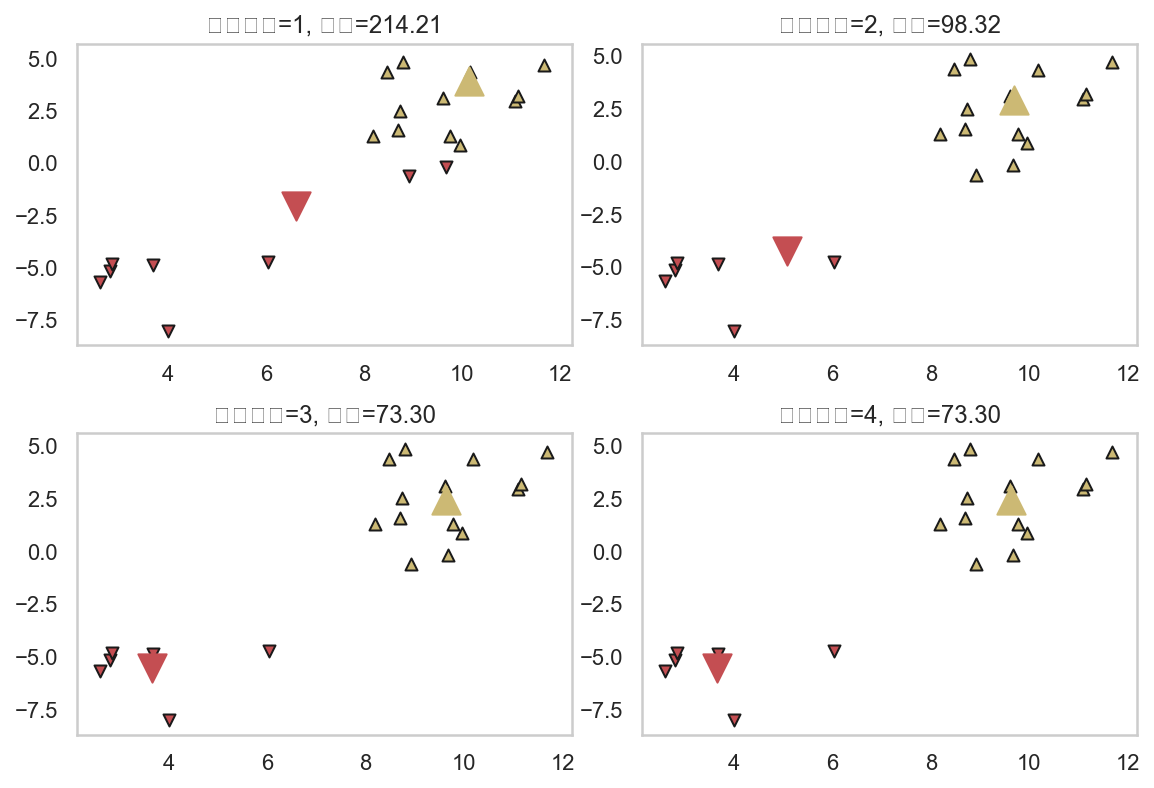

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

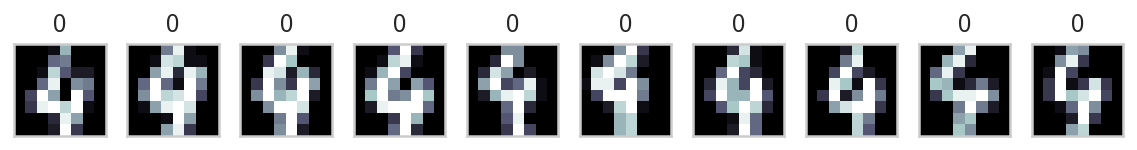

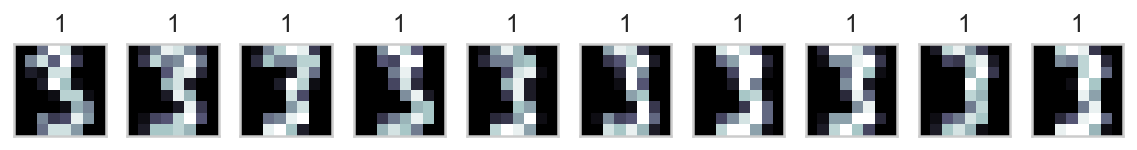

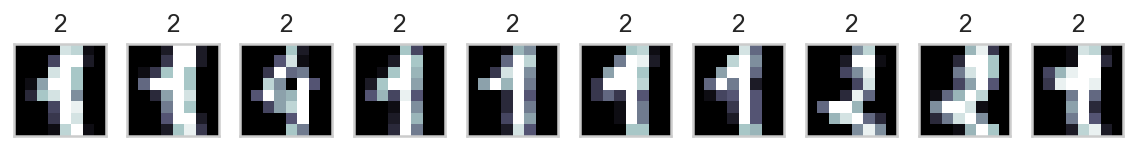

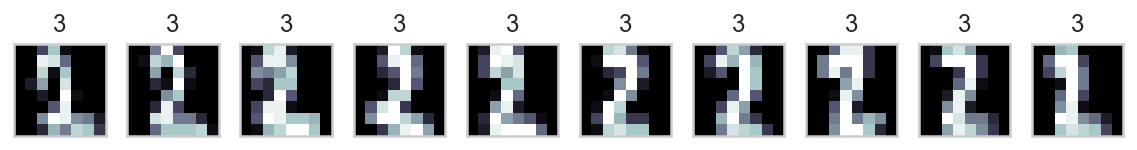

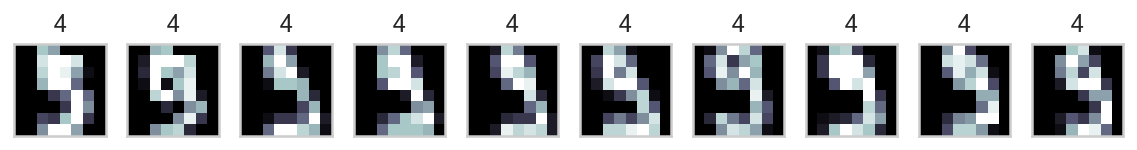

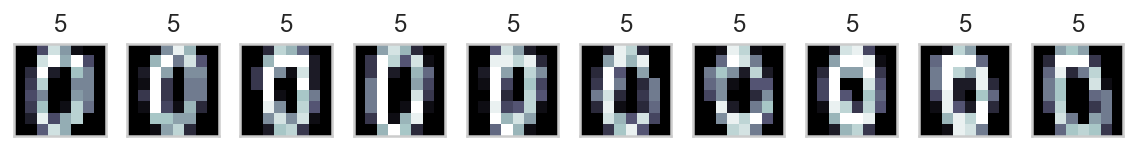

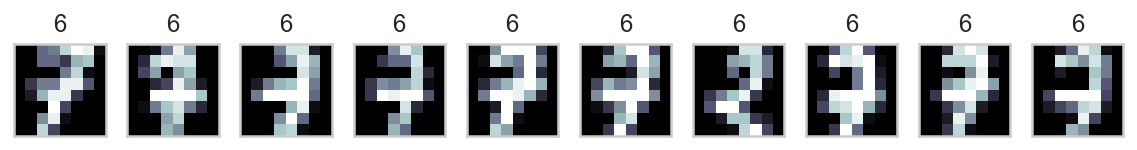

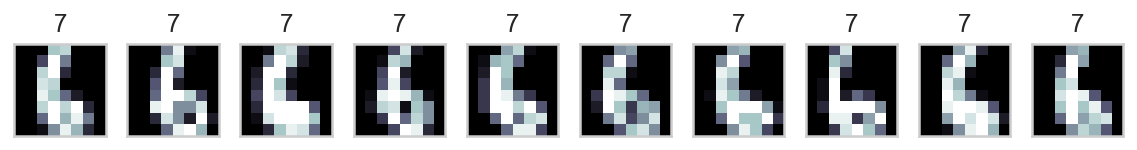

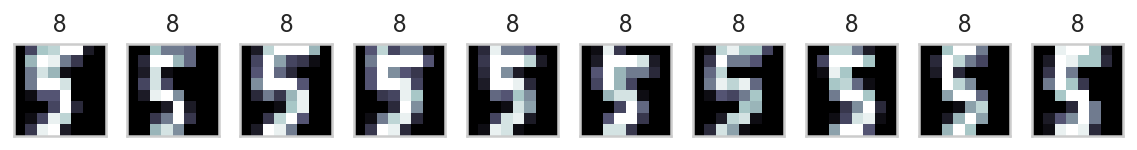

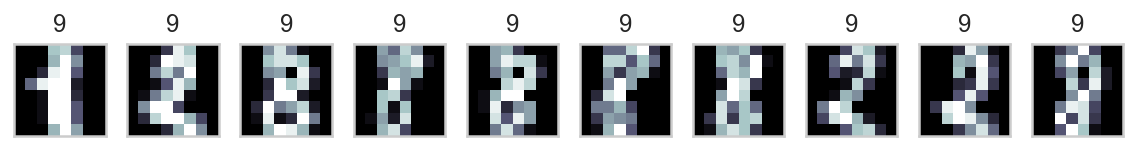

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,  55,  24,   0,   0,   0,   2,   1,  99],
       [  0,  13,   2, 148,   2,   1,   3,   0,   0,   8],
       [  0, 155,   0,   1,  11,   0,   7,   0,   2,   7],
       [163,   0,   7,   0,   0,   0,   7,   0,   0,   4],
       [  2,   1,   0,   0,  42,   0,   0,   1, 136,   0],
       [  0,   0,   1,   0,   0,   1,   0, 177,   0,   2],
       [  0,   0,   0,   0,   0,   0, 177,   0,   0,   2],
       [  0,   4,   6,   3,  48,   0,   5,   2,   4, 102],
       [  0,   6,  20,   0, 139,   0,   7,   0,   6,   2]], dtype=int64)

In [5]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6703800183468681
AMI: 0.7417664506416767
Silhouette Score: 0.18249069204151275


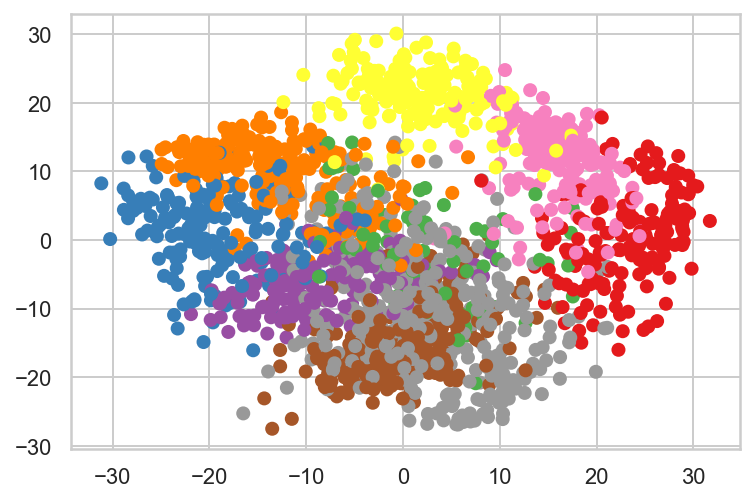

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

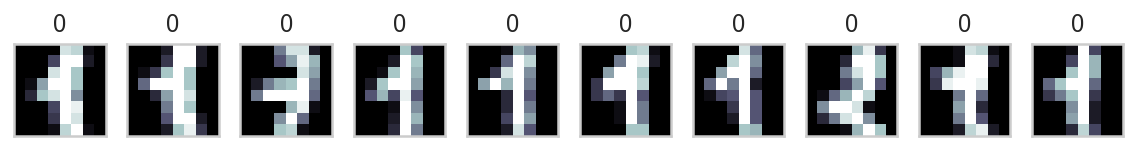

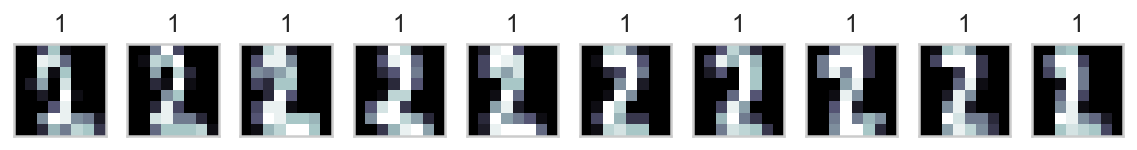

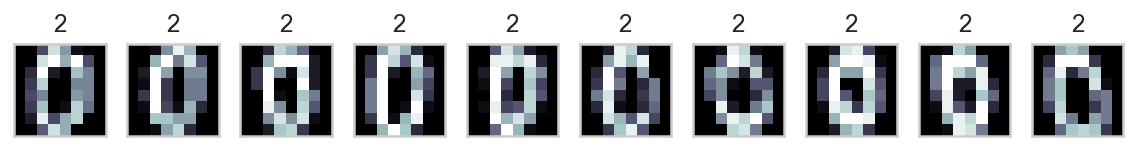

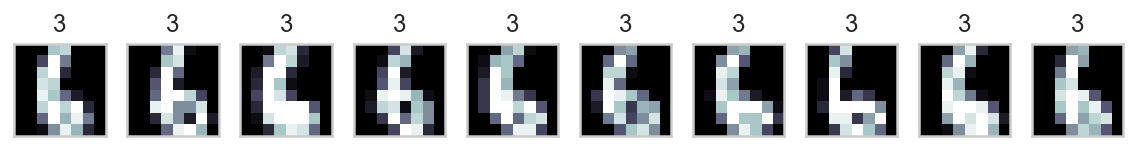

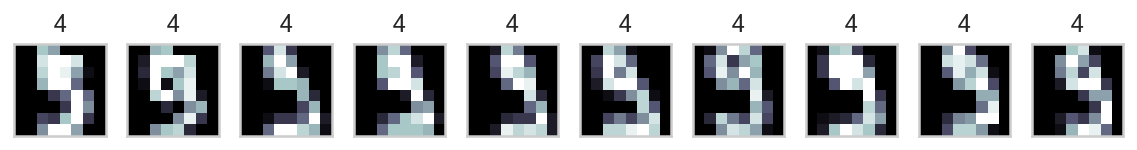

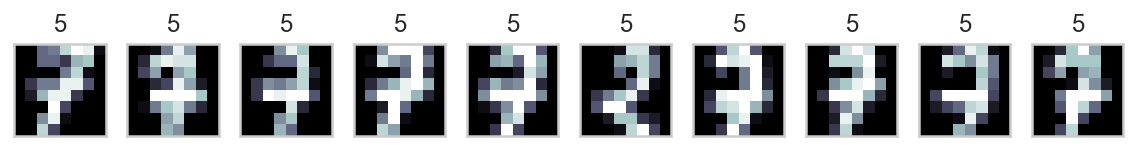

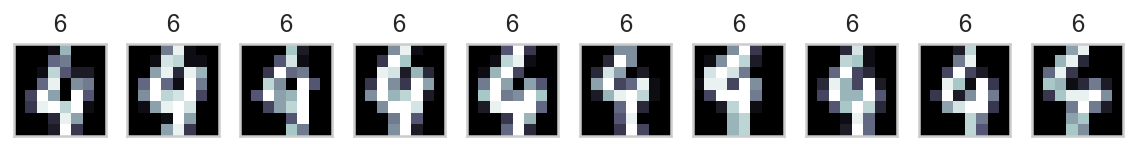

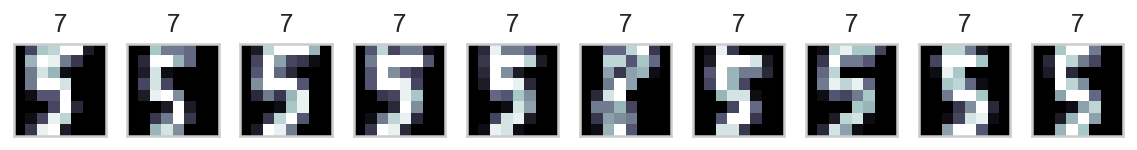

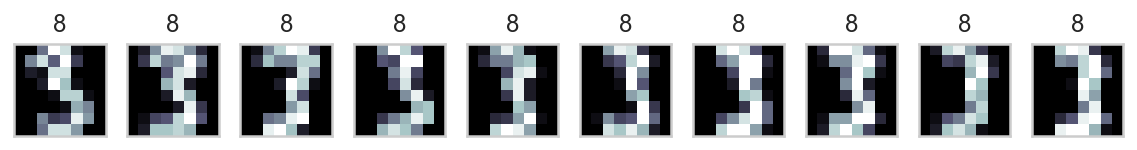

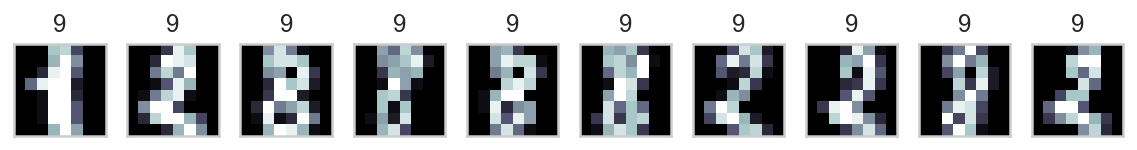

In [17]:
# data pca

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()
data_pca = PCA(n_components=10)
pca_X = data_pca.fit_transform(digits.data)

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(pca_X)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0, 176,   0,   0,   0,   2,   0,   0,   0],
       [ 55,  24,   0,   2,   0,   0,   0,   1,   1,  99],
       [  1, 151,   1,   0,   2,   3,   0,   0,  10,   9],
       [  0,   1,   0,   0,  17,   7,   0,   1, 151,   6],
       [  4,   0,   0,   0,   0,  11, 164,   0,   0,   2],
       [  0,   0,   0,   1,  42,   0,   2, 136,   1,   0],
       [  0,   0,   1, 176,   0,   0,   0,   0,   0,   4],
       [  3,   0,   0,   0,   0, 167,   2,   4,   0,   3],
       [  9,   3,   0,   2,  46,   5,   0,  13,   4,  92],
       [ 20,   0,   0,   0, 138,   7,   0,   7,   7,   1]], dtype=int64)

In [19]:
print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6514972746871065
AMI: 0.7236295748863463
Silhouette Score: 0.1812685321080544


In [116]:
# DBSCAN
model = DBSCAN(eps=24, min_samples=17)
y_pred = model.fit_predict(digits.data)
print("label length:", len(set(model.labels_)))
print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))

label length: 12
ARI: 0.5617425912841857
AMI: 0.7380472454098403


In [124]:
# DBSCAN
from sklearn.cluster import DBSCAN
max = 0
for j in range(20, 50):
    for i in range(10, 50):
        model = DBSCAN(eps=j, min_samples=i)
        y_pred = model.fit_predict(digits.data)
        labels = len(set(model.labels_)) - 1
        ami = adjusted_mutual_info_score(digits.target, y_pred)
        if labels >= 10 and labels <= 20 and max < ami:
            max = ami
            print(j, i, labels, max)
# print("label length:", len(set(model.labels_)))
# print("ARI:", adjusted_rand_score(digits.target, y_pred))
# print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))

20 10 15 0.6148742685245965
21 10 15 0.6957053075014338
22 10 13 0.6981536574216879
22 11 14 0.7097384570075133
22 12 15 0.7212568548024304
23 14 13 0.7249057941914615
24 17 12 0.7380472454098403
